Current working dir: C:\Users\antalb\PycharmProjects\SVM\Notebooks


,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,...,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
0,-0.016736,0.003814,0.010599,0.011069,-0.017336,-0.000829,-0.001094,0.005725,-0.002176,-0.010775,...,0.003130,-0.002199,-0.003324,-0.001189,0.000656,-0.000808,0.011403,0.007686,0.013286,0.000099
1,-0.014059,0.014167,0.003693,-0.009533,0.018294,0.000485,-0.011034,0.004037,0.005467,-0.000222,...,-0.004410,-0.015267,-0.000457,-0.003589,-0.005579,-0.004315,-0.013645,0.003666,0.002245,-0.002228
2,0.012173,-0.009224,0.004131,0.030843,-0.001797,0.003233,0.012338,-0.009144,0.005423,-0.022236,...,-0.011926,0.000115,0.000318,0.017865,-0.024317,-0.010412,0.001711,0.003426,-0.023199,0.001803
3,-0.013827,-0.000737,-0.004162,-0.037832,-0.001164,0.006543,0.007879,-0.001339,-0.019837,0.004997,...,0.007445,0.005561,0.010649,0.021728,0.005896,-0.005345,0.011654,-0.007907,0.038073,-0.000791
4,0.003624,0.008856,-0.002066,0.011025,-0.006213,-0.001314,0.024803,-0.002583,-0.000451,0.005807,...,0.013463,0.018986,0.003621,-0.030381,-0.014340,0.024998,0.007344,0.004205,0.003791,-0.002250
5,0.012037,-0.017455,0.001082,0.022997,0.010020,0.024213,0.015475,0.006682,-0.015673,-0.007908,...,0.016348,-0.006527,0.013044,-0.013417,0.013219,-0.011138,-0.010556,-0.008150,0.007216,-0.000067
6,0.008198,-0.006023,0.005721,0.038550,0.000638,-0.013802,-0.011918,-0.009653,-0.000775,0.009947,...,0.003113,-0.008294,0.006114,-0.032805,-0.014522,-0.002811,0.011673,-0.002525,0.018387,0.017870
7,0.007096,0.018075,0.005791,0.006237,0.003575,-0.006914,-0.000399,-0.022124,-0.006348,0.003413,...,-0.007021,0.004390,0.001719,0.006444,-0.026869,-0.002253,0.044402,-0.018550,-0.017943,0.003942
8,0.023867,-0.009964,-0.003344,0.017432,-0.012134,-0.009133,0.004425,-0.010206,-0.012145,0.005055,...,-0.003267,0.006935,0.012784,0.004716,-0.015831,-0.029230,0.007386,0.019343,-0.035074,-0.003687
9,0.010886,-0.005086,-0.000662,-0.000626,0.007718,0.036282,0.010794,0.001755,-0.001564,-0.001572,...,-0.027114,0.009821,-0.001070,-0.006475,0.017653,-0.003064,-0.015779,0.016539,-0.020715,0.008257


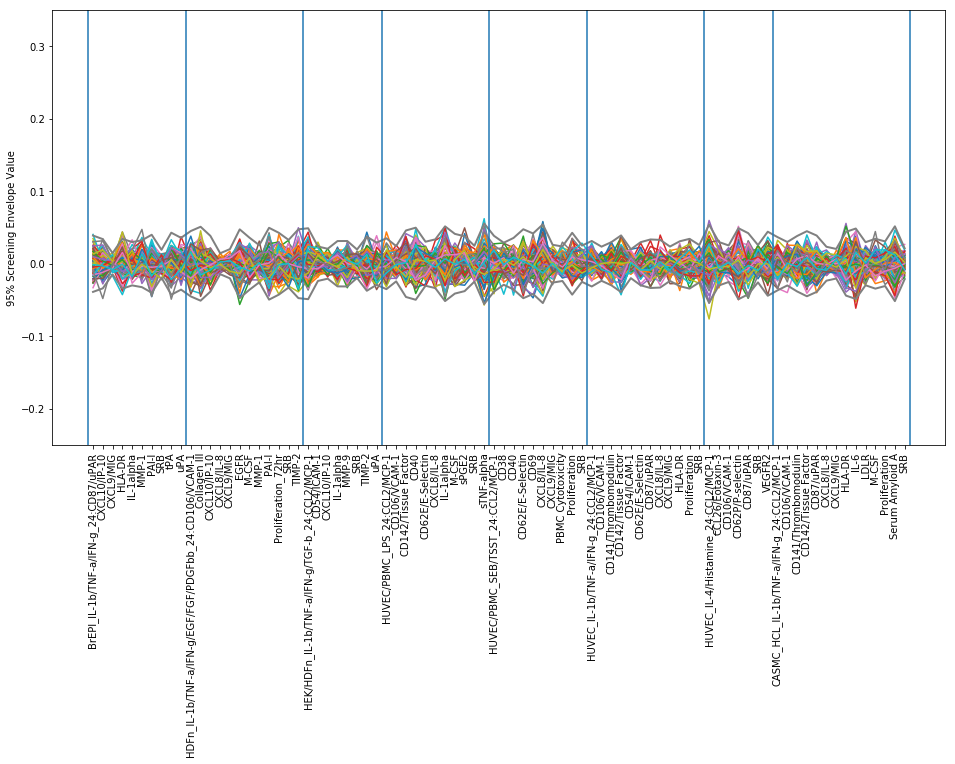

In [5]:
import numpy as np
import pandas as pd
from random_profiles import RandomProfileGenerator
import matplotlib.pyplot as plt
%matplotlib inline


import os
print("Current working dir: {}".format(os.getcwd()))

# Initialize the random profile genearator with sig env values and profile data file for S:M
rpg = RandomProfileGenerator(envelope_file='SigEnvelopeFile.xml', data_file='SVMData.xlsx')

envelope=RandomProfileGenerator.TRUSTED 
conf=RandomProfileGenerator._95
rp_df = rpg.get_random_profiles(prof_num=100, envelope=envelope,conf=conf, dist='rand')
screen_envelope = rpg.get_envelope(envelope=envelope,conf=conf)

plt.figure(figsize=(16,8))
display(rp_df)

## Plot Random Profiles
system_markers = rp_df.columns.values
r_profiles = rp_df.values.tolist()
for row in r_profiles:
    # plt.scatter(x, r_profiles[rp], s=np.abs(5000*np.power(r_profiles[rp],2))) # plot controlling size
    plt.plot(range(len(row)), row) # plot controlling size
    

## Plot envelope
envelope_values = np.array([float(screen_envelope[sm]) for sm in system_markers])
x = range(len(envelope_values))
plt.plot(x, envelope_values, 
         x, -envelope_values, c='gray', linewidth=2)


x_labels = []
last_sys = ""
systems = []
v_line_positions = []

for i, sm in enumerate(system_markers):
    s,m = sm.split(':')
    #x_labels.append(m)
    if (last_sys != s):
        x_labels.append("{}:{}".format(s,m))            
        last_sys = s
        systems.append(s)
        v_line_positions.append(i)
    else:
        x_labels.append(m)
            
    
v_line_positions.append(len(system_markers))


plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('95% Screening Envelope Value');
plt.ylim(-0.25,0.35)

# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)